<a href="https://colab.research.google.com/github/adipai/data-decent/blob/main/src/elbo_method_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmlb

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/imbalance_defects_prediction/
   creating: data/project_health/
  inflating: data/README.md          
   creating: data/JavaScript_Vulnerability/
   creating: data/Bug_Reports/
   creating: data/Vulnerable_Files/
   creating: data/defects_prediction/
   creating: data/imbalance_defects_prediction/7_CK_NET_PROC/
   creating: data/imbalance_defects_prediction/2_NET/
   creating: data/imbalance_defects_prediction/4_CK_NET/
   creating: data/imbalance_defects_prediction/3_PROC/
   creating: data/imbalance_defects_prediction/6_NET_PROC/
   creating: data/imbalance_defects_prediction/1_CK/
   creating: data/imbalance_defects_prediction/5_CK_PROC/
   creating: data/project_health/monthly_closed_PRs_2mo/
   creating: data/project_health/monthly_commits_2mo/
   creating: data/project_health/monthly_open_PRs_2mo/
   creating: data/project_health/monthly_closed_issues_2mo/
   creating: data/project_health/monthly_commits_12mo/
   creating: d

In [8]:
# All imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from pmlb import fetch_data
from scipy.io import arff

In [4]:
def elbo_method(X):
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)

  plt.plot(range(1, 11), wcss)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [5]:
def split_data(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  return X_train, X_test, y_train, y_test

#Rows:  286
#Columns:  10
Class-Distribution:  70 30


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

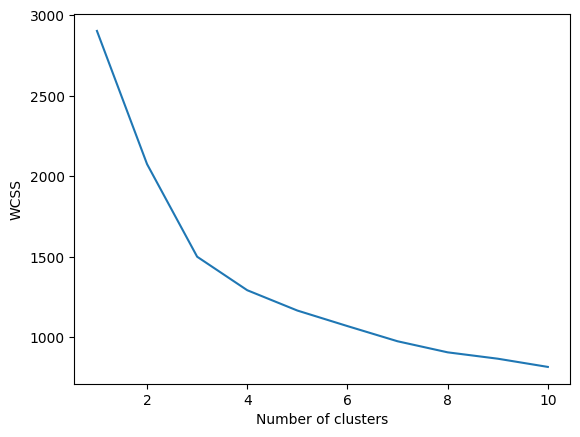

In [9]:
df = fetch_data('breast_cancer')
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)


#Rows:  5000
#Columns:  21
Class-Distribution:  85 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

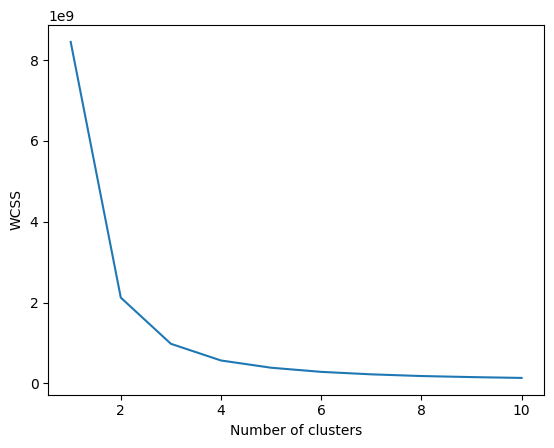

In [10]:
df = fetch_data('churn')
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

0      0
1      0
2      0
3      0
4      0
      ..
992    0
993    0
994    0
995    0
996    0
Name: isBug, Length: 997, dtype: int64
before drop duplicates 997
after drop duplicates 997
#Rows:  997
#Columns:  82
Class-Distribution:  79 21


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

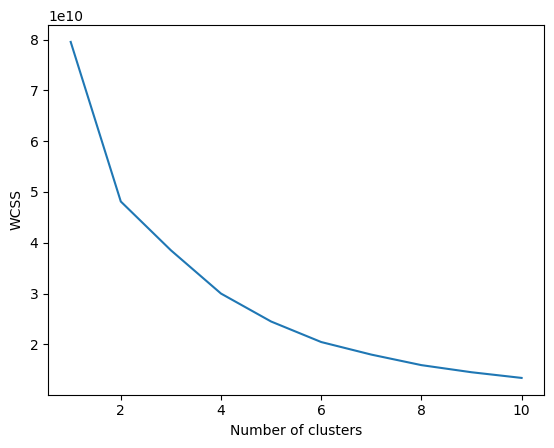

In [11]:

project = "Defect_Eclipse_JDT_Core"
fname = "_".join(project.split("_")[1:])
data_path = f"data/imbalance_defects_prediction/7_CK_NET_PROC/input/{fname}--CK_NET_PROC.arff"
data = arff.loadarff(data_path)
df = pd.DataFrame(data[0])
df['isBug'] = df['isBug'].astype('str')
d = {'YES': 1, 'NO': 0}  # Remove the byte string prefix 'b'
df['isBug'] = df['isBug'].map(d).fillna(df['isBug'])
print(df['isBug'])
print("before drop duplicates", df.shape[0])
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)
print("after drop duplicates", df.shape[0])
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

0       1
1       0
2       0
3       1
4       0
       ..
1492    0
1493    0
1494    0
1495    0
1496    0
Name: isBug, Length: 1497, dtype: int64
before drop duplicates 1497
after drop duplicates 1497
#Rows:  1497
#Columns:  82
Class-Distribution:  86 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

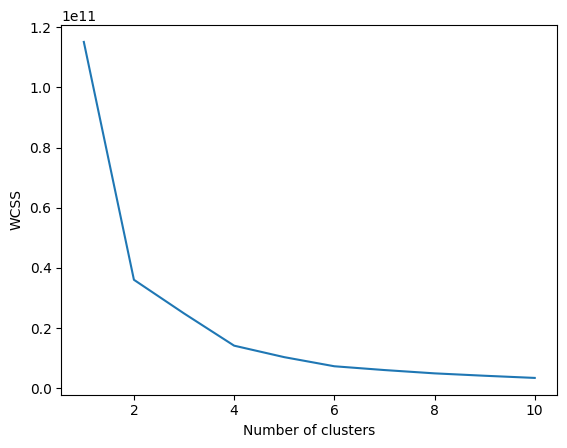

In [12]:

project = "Defect_Eclipse_PDE_UI"
fname = "_".join(project.split("_")[1:])
data_path = f"data/imbalance_defects_prediction/7_CK_NET_PROC/input/{fname}--CK_NET_PROC.arff"
data = arff.loadarff(data_path)
df = pd.DataFrame(data[0])
df['isBug'] = df['isBug'].astype('str')
d = {'YES': 1, 'NO': 0}  # Remove the byte string prefix 'b'
df['isBug'] = df['isBug'].map(d).fillna(df['isBug'])
print(df['isBug'])
print("before drop duplicates", df.shape[0])
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)
print("after drop duplicates", df.shape[0])

print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

before drop duplicates 1862
after drop duplicates 1861
#Rows:  1861
#Columns:  82
Class-Distribution:  86 14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

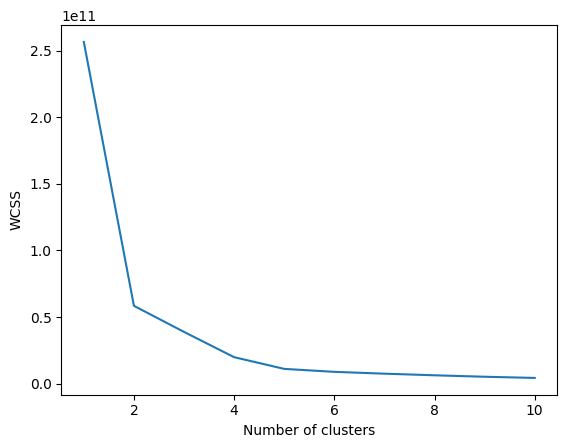

In [13]:

project = "Defect_Mylyn"
fname = "_".join(project.split("_")[1:])
data_path = f"data/imbalance_defects_prediction/7_CK_NET_PROC/input/{fname}--CK_NET_PROC.arff"
data = arff.loadarff(data_path)
df = pd.DataFrame(data[0])
df['isBug'] = df['isBug'].astype('str')
d = {'b\'YES\'': 1, 'b\'NO\'': 0}
df['isBug'] = df['isBug'].astype(str).map(d).fillna(df['isBug'])
df['isBug'] = df['isBug'].map({'YES': 1.0, 'NO': 0.0})
print("before drop duplicates", df.shape[0])
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)
print("after drop duplicates", df.shape[0])
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

before drop duplicates 2942
after drop duplicates 2056
#Rows:  2056
#Columns:  14
Class-Distribution:  98 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

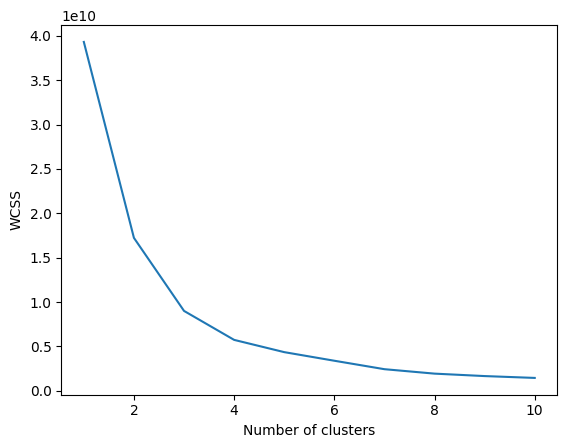

In [14]:
data_path = f"data/Vulnerable_Files/moodle-2_0_0-metrics.arff"
data = arff.loadarff(data_path)
df = pd.DataFrame(data[0])
df['IsVulnerable'] = df['IsVulnerable'].astype('str')
d = {'b\'yes\'': 1, 'b\'no\'': 0}
df['IsVulnerable'] = df['IsVulnerable'].astype(str).map(d).fillna(df['IsVulnerable'])
df['IsVulnerable'] = df['IsVulnerable'].map({'yes': 1.0, 'no': 0.0})
# df.drop(['loc', 'nOutgoingExternFlsCalled', 'nOutgoingExternCallsUniq'], inplace=True, axis=1)
print("before drop duplicates", df.shape[0])
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)
print("after drop duplicates", df.shape[0])
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

#Rows:  1000
#Columns:  102
Class-Distribution:  97 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

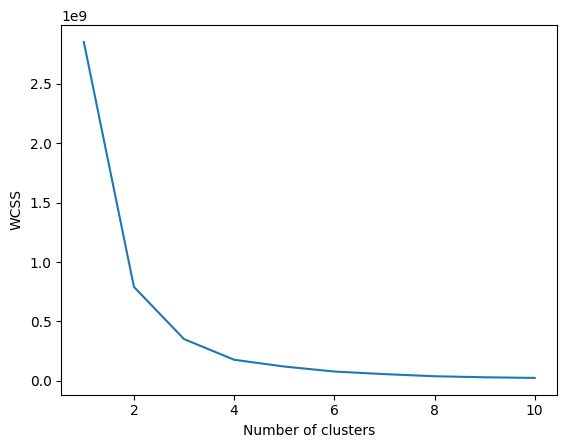

In [15]:
train_data_path = f"data/Bug_Reports/ambari-train.csv"
test_data_path = f"data/Bug_Reports/ambari-test.csv"
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

df = pd.concat([train_df, test_df])
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)

before drop duplicates 12125
after drop duplicates 6271
#Rows:  6271
#Columns:  36
Class-Distribution:  85 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

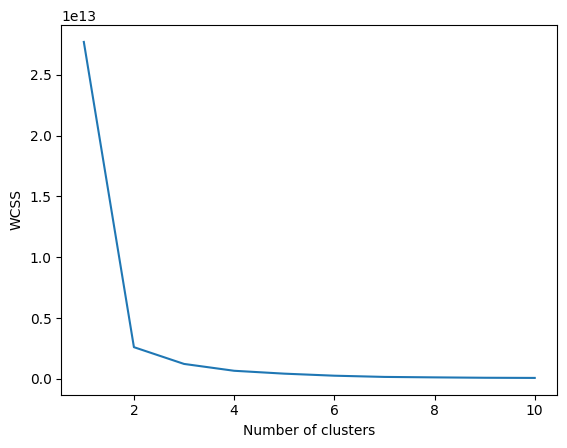

In [16]:

data_path = f"data/JavaScript_Vulnerability/JSVulnerabilityDataSet-1.0.csv"
df = pd.read_csv(data_path)
drop_columns = ["name", "longname", "path", "full_repo_path", "line", "column", "endline", "endcolumn"]
df = df.drop(drop_columns, axis=1)
print("before drop duplicates", df.shape[0])
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)
print("after drop duplicates", df.shape[0])
print("#Rows: ", len(df))
print("#Columns: ", len(df.columns))
print("Class-Distribution: ", int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100), 100-int((np.unique(df.iloc[:,-1], return_counts=True)[1][0]/len(df))*100))

X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = split_data(X, y)
elbo_method(X_train)